In [1]:
import random

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [2]:
class LinearRegression():

  def __init__(self, lr, epochs, 
               w = random.uniform(-5,5), w0 = random.uniform(-5,5)):
    self.lr = lr
    self.epochs = epochs
    self.w = w
    self.w_first = w
    self.w0 = w0
    self.w0_first = w0

  def fit(self, X, Y):
    Vdw = Vdw0 = 0
    B = 0.9
    for e in range(self.epochs):
      for x, y in zip(X, Y):
        y_new = self.w * x + self.w0
        dEdw = -2 * (y - y_new) * x
        dEdw0 = -2 * (y - y_new)
        Vdw = B * Vdw + ( 1 - B)
        Vdw0 = B * Vdw0 + ( 1 - B)
        self.w = self.w - self.lr * Vdw
        self.w0 = self.w0 - self.lr * Vdw0

  def predict(self, X):
    return [self.w * x + self.w0 for x in X]
  
  def MSE (self, X, Y):
    n = len(X)
    sum = 0
    Y_pred = self.predict(X)
    for y, y_n in zip(Y, Y_pred):
      sum += (y - y_n)**2
      error = sum / n
    return error
  
  def MAE (self, X, Y):
    n = len(X)
    sum = 0
    Y_pred = self.predict(X)
    for y, y_n in zip(Y, Y_pred):
      sum += abs(y - y_n)
      error = sum / n
    return error

In [3]:
lr = 0.01
epochs = 150
w = 0.4

X_train = [1, 2, 3, 3.5, 4, 6, 7.5, 8.5, 9]
Y_train = [4.3, 7, 8, 10.1, 11.3, 14.2, 18.5, 19.3, 21.4]

In [4]:
fuel_rate = LinearRegression(lr, epochs, w)

# Обучаем модель
fuel_rate.fit(X_train, Y_train)

# Выводим начальный коэффициент
print(f'Начальное значение коэффициента: w = {fuel_rate.w_first} w0 = {fuel_rate.w0_first}')

# Выводим получившийся коэффициент
print(f'Получившееся значение коэффициента: w = {fuel_rate.w} w0 = {fuel_rate.w0}')

Начальное значение коэффициента: w = 0.4 w0 = 3.793211127067954
Получившееся значение коэффициента: w = -13.00999999999978 w0 = -9.616788872931888


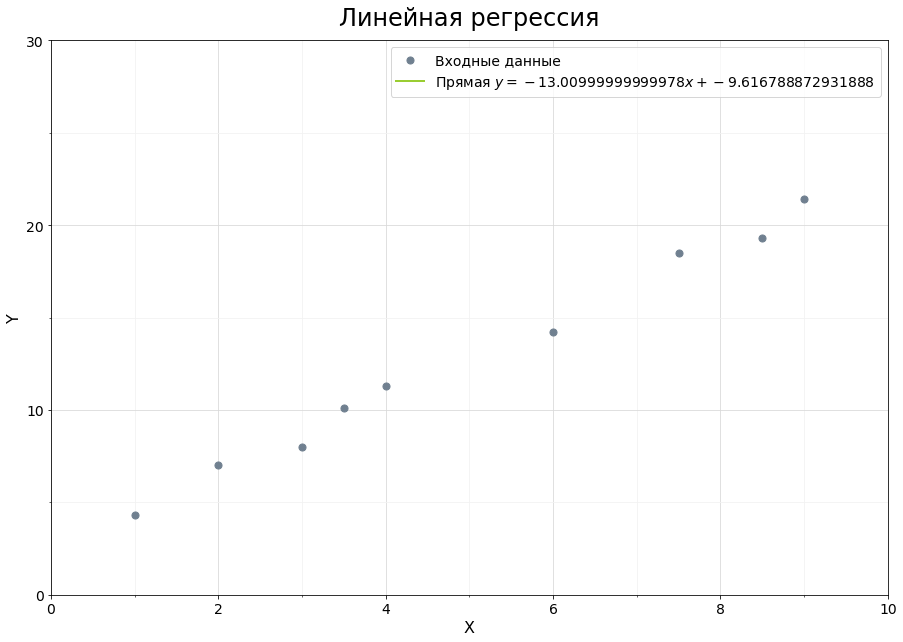

In [6]:
# Строим графики

xlim = (0, 10)
ylim = (0, 30)

fig, ax = plt.subplots(figsize=(15,10), dpi=72)
ax.set_title('Линейная регрессия', pad='15', fontsize=24)

ax.set_xlabel('X', fontsize=16)
ax.set_ylabel('Y', fontsize=16)

ax.set(xlim=xlim, ylim=ylim)

ax.tick_params(axis='both', labelsize=14)
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(5))

ax.grid(True, color='0.85', linestyle='-')
ax.grid(which='minor', color='0.95', linestyle='-')

ax.scatter(X_train, Y_train,
           color='slategrey', 
           s=50, zorder=2,
           label='Входные данные')
"""
ax.plot(xlim, [fuel_rate.w_first*x for x in xlim], 
        'tomato', linewidth=2, 
        label=f'Начальная прямая $y = {fuel_rate.w_first}x$')
"""
ax.plot(xlim, fuel_rate.predict(xlim), 
        'yellowgreen', linewidth=2,
        label=f'Прямая $y = {fuel_rate.w}x + {fuel_rate.w0}$')

# Отображение графиков
ax.legend(loc='best', fontsize=14)
#plt.savefig('my_plot.png', transparent= True)
plt.show()

In [7]:
fuel_rate.predict(X_test)

NameError: ignored

In [ ]:
fuel_rate.MSE(X_test, Y_test)

177.78360539416286

In [ ]:
fuel_rate.MAE(X_test, Y_test)

12.79753089668533